In [60]:
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt
import matplotlib.pyplot as mtp 
import os

In [2]:
#Indian cities dataset consist cities and their latitude and longitude
csv_path='Indian Cities Database.csv'
df=pd.read_csv(csv_path)

In [3]:
df.index

RangeIndex(start=0, stop=213, step=1)

In [4]:
data=[]
lat_all=[]
long_all=[]
for ind in df.index:
    city=df['City'][ind]
    lat=df['Lat'][ind]
    long=df['Long'][ind]
    lat_all.append(lat)
    long_all.append(long)
    temp_tuple=(city,(lat,long))
    data.append(temp_tuple)
data

[('Abohar', (30.144533, 74.19552)),
 ('Adilabad', (19.4, 78.31)),
 ('Agartala', (23.836049, 91.279386)),
 ('Agra', (27.187935, 78.003944)),
 ('Ahmadnagar', (19.094571, 74.738432)),
 ('Ahmedabad', (23.025793, 72.587265)),
 ('Aizawl  ', (23.736701, 92.714596)),
 ('Ajmer', (26.452103, 74.638667)),
 ('Akola', (20.709569, 76.998103)),
 ('Alappuzha', (9.494647, 76.331108)),
 ('Aligarh', (27.881453, 78.07464)),
 ('Alipurduar', (26.4835, 89.522855)),
 ('Allahabad', (25.44478, 81.843217)),
 ('Alwar', (27.566291, 76.610202)),
 ('Ambala', (30.360993, 76.797819)),
 ('Amaravati', (20.933272, 77.75152)),
 ('Amritsar', (31.622337, 74.875335)),
 ('Asansol', (23.683333, 86.983333)),
 ('Aurangabad', (19.880943, 75.346739)),
 ('Aurangabad', (24.752037, 84.374202)),
 ('Bakshpur', (25.894283, 80.792104)),
 ('Bamanpuri', (28.804495, 79.040305)),
 ('Baramula', (34.209004, 74.342853)),
 ('Barddhaman', (23.255716, 87.856906)),
 ('Bareilly', (28.347023, 79.421934)),
 ('Belgaum', (15.862643, 74.508534)),
 ('Bell

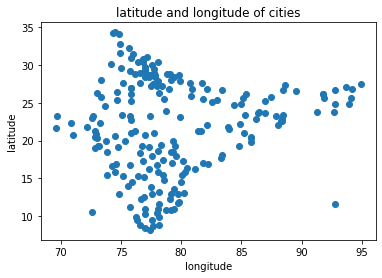

In [5]:
fig=mtp.figure()
mtp.scatter(long_all, lat_all)  
mtp.title('latitude and longitude of cities')  
mtp.xlabel('longitude')  
mtp.ylabel('latitude')  
mtp.show() 
fig.clear()
mtp.close(fig)

In [6]:
def earth_dist(lat1,long1,lat2,long2):
    #converting decimal degree to radians
    lat1,long1,lat2,long2=map(radians,[lat1,long1,lat2,long2])
    
    # Using Haversine formula for distance calculation
    dlat=lat2-lat1
    dlong=long2-long1
    a=sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlong/2)**2
    c=2 * asin(sqrt(a))
    r=6371 #radius of earth in km
    return c*r

In [7]:
dist_list=[]
i=0
j=0
for i in range(len(data)):
    tup1=data[i][1]
    dist_all=[]
    for j in range(len(data)):
        tup2=data[j][1]
        dist=earth_dist(tup1[0],tup1[1],tup2[0],tup2[1])
        dist_all.append(dist)
        j+=1
    dist_list.append(dist_all)
    i+=1
dist_matrix=np.array(dist_list)
dist_matrix

array([[   0.        , 1264.56305154, 1829.71611477, ..., 1405.97361791,
        1341.03109783, 1505.19428801],
       [1264.56305154,    0.        , 1427.72412453, ...,  964.47386319,
         642.8211153 ,  742.45556789],
       [1829.71611477, 1427.72412453,    0.        , ...,  495.46262016,
         786.70761727,  699.72574596],
       ...,
       [1405.97361791,  964.47386319,  495.46262016, ...,    0.        ,
         330.17582793,  329.0887384 ],
       [1341.03109783,  642.8211153 ,  786.70761727, ...,  330.17582793,
           0.        ,  166.59886224],
       [1505.19428801,  742.45556789,  699.72574596, ...,  329.0887384 ,
         166.59886224,    0.        ]])

In [8]:
import kmedoids

In [9]:
max_k=dist_matrix.shape[0]//3
def WCSS(dist):
    wcss_list=[]
    for n in range(1,max_k):
        M, C = kmedoids.kMedoids(dist, n)
        wcss=0
        i=0
        for i in range(n):
            cluster_wcss=0
            for j in C[i]:
                cluster_wcss+=(dist[j][M[i]])**2
            wcss+=cluster_wcss
            i+=1
        wcss_list.append(wcss)
        n+=1
    return wcss_list
wcss_list=WCSS(dist_matrix)
print(wcss_list)

[178231977.618007, 92631187.77158532, 48058639.94107713, 32455420.636600293, 26520867.736357473, 23317172.20338752, 18950463.28907935, 17683756.075619213, 19755780.27349661, 15901430.671415385, 13201759.130124247, 12730485.204721844, 11931225.5040074, 13457430.20978517, 10542835.140249096, 10555367.044390373, 9832730.468140515, 8802207.672310729, 8964922.691968903, 9321682.776938992, 8491179.81378117, 5934826.595610336, 7186013.339264035, 5818624.292909483, 6662798.391513632, 6055435.014521406, 6655646.689434878, 6025267.985935977, 5988564.832226257, 5972843.773262954, 3996169.021595466, 5509414.4997136975, 4925239.408622316, 4536600.130803987, 3729646.881293465, 4549777.316595695, 3610356.0051684994, 4462761.597455154, 4478402.894274776, 3850853.6986185503, 3336273.7332207314, 4301858.428323041, 3757637.3835421684, 2499881.856020323, 4199699.102931101, 4010310.189030904, 3962125.8435717197, 4045844.0035582306, 3397294.5772338267, 3975319.9841864607, 3798636.823221337, 4006526.62387228

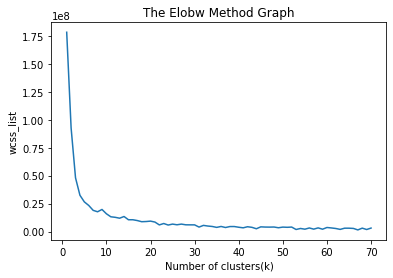

In [10]:
fig=mtp.figure()
mtp.plot(range(1, max_k), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()
#fig.clear()
#mtp.close(fig)

In [11]:
M, C = kmedoids.kMedoids(dist_matrix, 10)
print(M)
print(C)

[ 82  66  64 120 110 202  95 140  88 164]
{0: array([  0,  14,  16,  22,  50,  82,  94, 121, 147, 150, 151, 174, 182,
       187, 189], dtype=int64), 1: array([  3,   7,  10,  13,  21,  24,  29,  36,  43,  46,  47,  59,  60,
        66,  67,  72,  76,  78,  81,  83,  85,  93, 103, 127, 128, 130,
       132, 142, 148, 167, 171, 172, 184, 188, 199], dtype=int64), 2: array([  2,   6,  11,  62,  64,  69,  77,  89,  91,  98, 109, 180, 181,
       185, 191], dtype=int64), 3: array([ 12,  20,  30,  68,  73,  92,  96, 120, 129, 153, 173, 179, 193,
       205], dtype=int64), 4: array([ 26,  27,  51,  52,  55,  58,  84,  86,  87, 110, 116, 126, 134,
       141, 146, 156, 157, 175, 183, 197, 198, 206], dtype=int64), 5: array([  8,  15,  34,  37,  40,  90,  97, 107, 114, 145, 169, 178, 201,
       202], dtype=int64), 6: array([ 17,  19,  23,  28,  31,  33,  38,  44,  45,  56,  61,  70,  79,
        80,  95, 112, 115, 133, 152, 155, 159, 160, 162, 168, 170, 176,
       210, 211, 212], dtype=int64),

In [12]:
label=[0]*len(data)
long_cluster=[]
lat_cluster=[]
cluster_data=[]
cluster_name=[]
z=1
for key,item in C.items():
    long_cluster.append(list(map(lambda i:long_all[i],item)))
    lat_cluster.append(list(map(lambda i:lat_all[i],item)))
    k=1
    c_name="cluster"+str(z)
    z+=1
    cluster_name.append(c_name)
    single_cluster=[]
    for i,j in zip(long_cluster[key],lat_cluster[key]):
        single_cluster.append((str(k), str(i), str(j)))
        k+=1
    cluster_data.append(single_cluster)
    for i in item:
        label[i]=key
colors=['blue','orange','green','red','purple','brown','grey','pink','olive','cyan']
print(label)

[0, 8, 2, 1, 7, 7, 2, 1, 5, 9, 1, 2, 3, 1, 0, 5, 0, 6, 7, 6, 3, 1, 0, 6, 1, 8, 4, 4, 6, 1, 3, 6, 7, 6, 5, 7, 1, 5, 6, 7, 5, 8, 8, 1, 6, 6, 1, 1, 9, 8, 0, 4, 4, 8, 9, 4, 6, 7, 4, 1, 1, 6, 2, 9, 2, 7, 1, 1, 3, 2, 6, 7, 1, 3, 8, 8, 1, 2, 1, 6, 6, 1, 0, 1, 4, 1, 4, 4, 8, 2, 5, 2, 3, 1, 0, 6, 3, 5, 2, 8, 8, 7, 8, 1, 9, 9, 8, 5, 9, 2, 4, 8, 6, 9, 5, 6, 4, 9, 8, 8, 3, 0, 8, 9, 8, 7, 4, 1, 1, 3, 1, 7, 1, 6, 4, 9, 8, 8, 8, 7, 7, 4, 1, 8, 8, 5, 4, 0, 1, 8, 0, 0, 6, 3, 7, 6, 4, 4, 7, 6, 6, 8, 6, 8, 9, 7, 8, 1, 6, 5, 6, 1, 1, 3, 0, 4, 6, 8, 5, 3, 2, 2, 0, 4, 1, 2, 7, 0, 1, 0, 7, 2, 9, 3, 9, 9, 9, 4, 4, 1, 9, 5, 5, 7, 9, 3, 4, 8, 8, 8, 6, 6, 6]


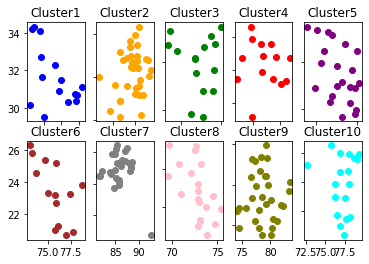

In [14]:
fig, ((ax0, ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8, ax9)) = mtp.subplots(2, 5)
#fig.suptitle('Individual Clusters')
ax_list=[ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]
i=0
for ax in fig.get_axes():
    ax_list[i].scatter(long_cluster[i], lat_cluster[i],c=colors[i])
    ax_list[i].set_title('Cluster'+str(i+1))
    ax.label_outer()
    i+=1

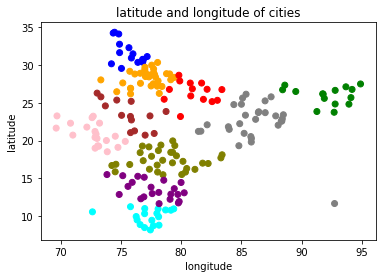

In [15]:
fig.clear()
mtp.close(fig)
fig=mtp.figure()
mtp.scatter(long_all, lat_all, c=list(map(lambda i:colors[i],label)))  
mtp.title('latitude and longitude of cities')  
mtp.xlabel('longitude')  
mtp.ylabel('latitude')  
mtp.show()
fig.clear()
mtp.close(fig)

In [16]:
idc=list(range(1,len(M)+1))
idc=list(map(lambda i:str(i),idc))
long_center=list((map(lambda i:str(long_all[i]),M)))
lat_center=list((map(lambda i:str(lat_all[i]),M)))
coord_center=list(zip(idc,long_center,lat_center))
print(coord_center)
cluster_name.append("CentroidCluster")
cluster_data.append(coord_center)

[('1', '75.986418', '31.463218'), ('2', '77.313162', '28.411236'), ('3', '91.800688', '26.135638'), ('4', '80.923133', '26.839281'), ('5', '78.129989', '13.137679'), ('6', '75.776433', '23.182387'), ('7', '86.185448', '22.802776'), ('8', '72.916667', '20.85'), ('9', '78.456355', '17.384052'), ('10', '77.556121', '9.451111')]


In [17]:
#del df
#del wcss_list
#del M
import gc
gc.collect()
from julia import Main as jl
jl.include("Firefly.jl")

<PyCall.jlwrap main>

In [18]:
solution=jl.main(cluster_data,cluster_name)

<Figure size 432x288 with 0 Axes>

In [19]:
print(solution)

[[array([ 5.,  8.,  6., 10., 15.,  4., 12.,  7.,  3.,  1., 14., 11.,  2.,
       13.,  9.], dtype=float32), array([76.7884  , 75.85379 , 75.98642 , 75.65286 , 74.80555 , 74.34285 ,
       74.45709 , 74.86911 , 74.875336, 74.19552 , 75.028984, 76.3922  ,
       76.79782 , 77.166626, 76.85374 ], dtype=float32), array([30.736292, 30.912043, 31.463219, 32.27484 , 34.08565 , 34.209003,
       34.318172, 32.735687, 31.622337, 30.144533, 29.534893, 30.336245,
       30.360992, 31.104424, 30.691511], dtype=float32)], [array([28., 13., 25., 16., 19., 11., 32., 12., 29., 21.,  8.,  4., 22.,
       35., 30.,  9., 33.,  2., 18., 15., 20.,  1., 24.,  7.,  3.,  6.,
       10.,  5., 26., 27., 23., 31., 34., 14., 17.], dtype=float32), array([77.2     , 77.2315  , 77.70635 , 77.43915 , 77.78068 , 77.857735,
       77.54522 , 78.03392 , 76.96825 , 75.722946, 76.13968 , 76.6102  ,
       75.78787 , 75.78611 , 75.78934 , 73.31496 , 75.13867 , 74.638664,
       78.17337 , 78.397804, 78.01384 , 78.003944, 7

In [73]:
city_path_id=list(map(lambda i:solution[i][0],range(0,len(solution))))
new_list=[]
for i in range(0,len(city_path_id)):
    temp_list=[]
    for j in range(0,len(city_path_id[i])):
        temp_list.append(int(city_path_id[i][j])-1)
    new_list.append(temp_list)
city_path_id=new_list
city_paths=[]
n=0
for path_id in city_path_id:
    if(n==len(M)):
        break
    city_id=list(map(lambda i:C[n][i],path_id))
    city_names=list(map(lambda i:data[i][0],city_id))
    city_paths.append(city_names)
    n+=1
cluster_id=city_path_id[-1]
city_id=list(map(lambda i:M[i],cluster_id))
centroid_cities_path=list(map(lambda i:data[i][0],city_id))

In [72]:
final_path=[]
final_path_latitude=[]
final_path_longitude=[]
label_final_path=[]
cluster_path_lat=[]
cluster_path_long=[]
for i in city_path_id[-1]:
    cluster_path_lat.append(solution[i][2])
    cluster_path_long.append(solution[i][1])
    for t in range(0,len(solution[i][0])):
        sol_long_list=solution[i][1]
        sol_lat_list=solution[i][2]
        final_path_longitude.append(sol_long_list[t])
        final_path_latitude.append(sol_lat_list[t])
        label_final_path.append(i)
    for k in city_paths[i]:
        final_path.append(k)
print(final_path)

['Valparai', 'Kavaratti', 'Calicut', 'Coimbatore', 'Dindigul', 'Madurai', 'Kochi', 'Alappuzha', 'Kollam', 'Tirunelveli', 'Nagercoil', 'Thiruvananthapuram', 'Tuticorin', 'Rajapalaiyam', 'Thanjavur', 'Kumbakonam', 'Tiruchchirappalli', 'Karur', 'Pune', 'Ahmadnagar', 'Aurangabad', 'Nasik', 'Malegaon Camp', 'Silvassa', 'Daman', 'Navsari', 'Diu', 'Porbandar', 'Bhuj', 'Rajkot', 'Ghandinagar', 'Ahmedabad', 'Vadodara', 'Surat', 'Bhavnagar', 'Bhiwandi', 'Mumbai', 'Kalyan', 'Amaravati', 'Saugor', 'Bhopal ', 'Indore', 'Udaipur', 'Pali', 'Jodhpur', 'Bhilwara', 'Kota', 'Ujjain', 'Ratlam', 'Khanapur', 'Bhusaval', 'Akola', 'New Delhi', 'Delhi', 'Meerut', 'Ghaziabad', 'Hapur', 'Bulandshahr', 'Saharanpur', 'DehraDun', 'Panipat', 'Hisar', 'Bhiwani', 'Alwar', 'Jaipur', 'Tonk', 'Rampura', 'Bikaner', 'Sikar', 'Ajmer', 'Gwalior', 'Firozabad', 'Hata', 'Agra', 'Mathura', 'Bharatpur', 'Aligarh', 'Bareilly', 'Budaun', 'Bamanpuri', 'Moradabad', 'Muzaffarnagar', 'Karnal', 'Rohtak', 'Sonipat', 'Faridabad', 'Gurugra

Individual cluster path images:




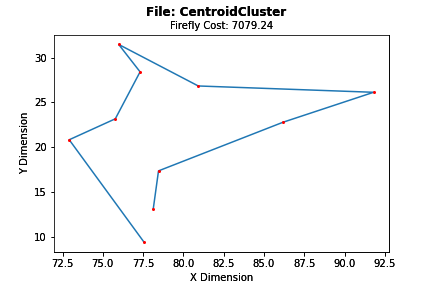

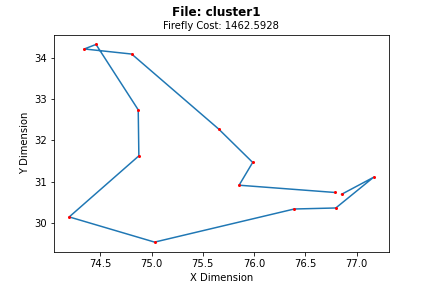

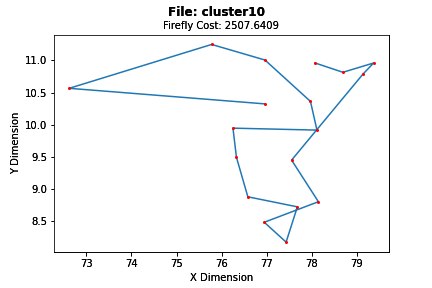

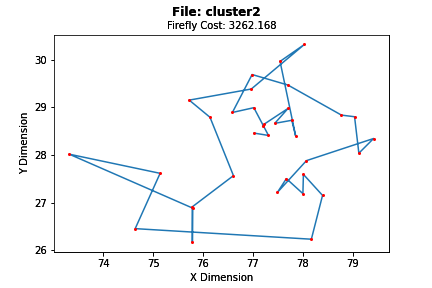

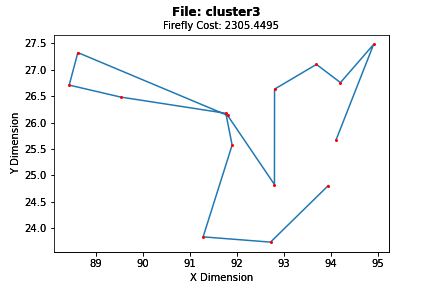

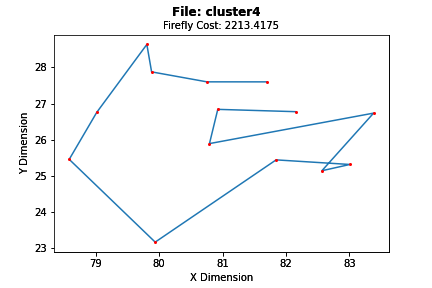

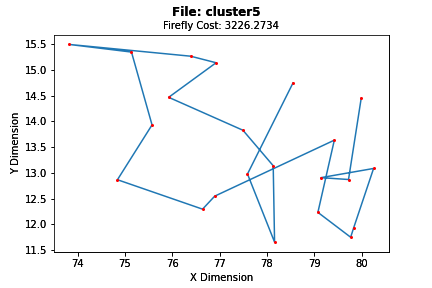

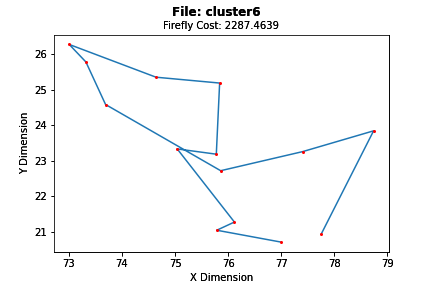

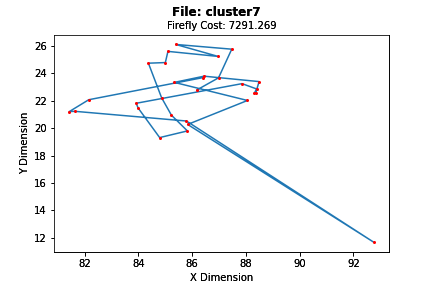

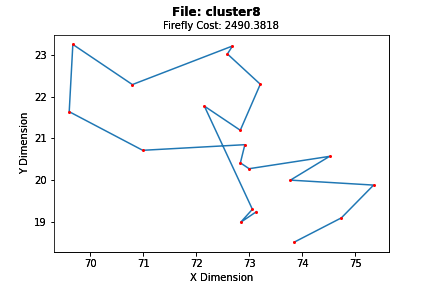

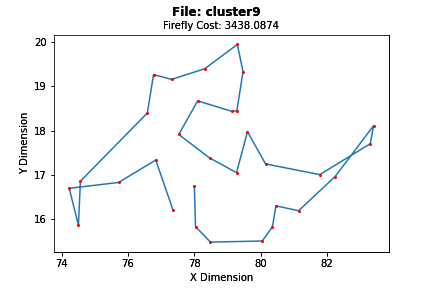

Iteration cost images:




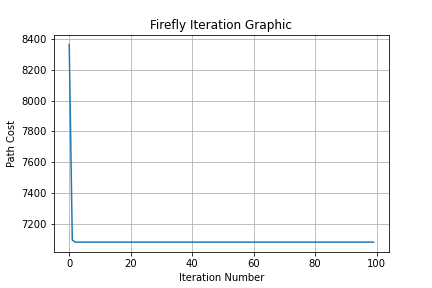

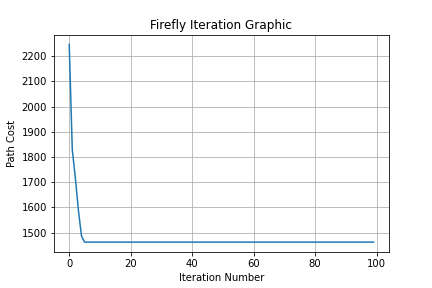

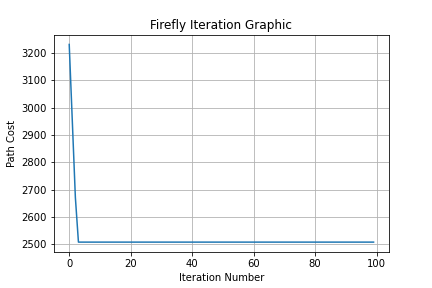

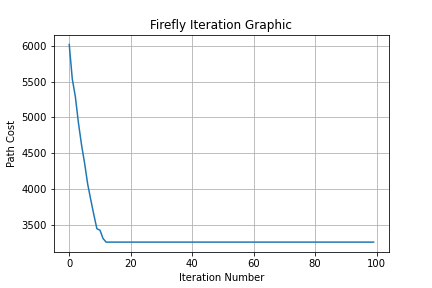

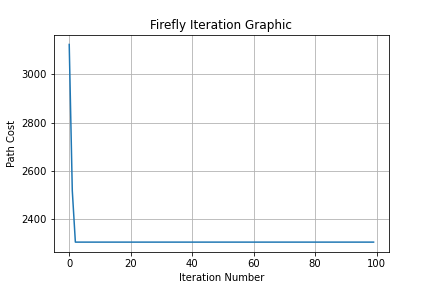

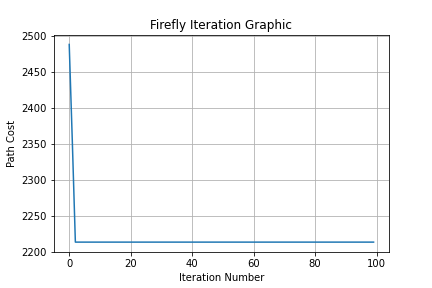

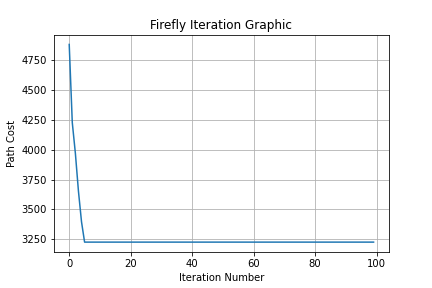

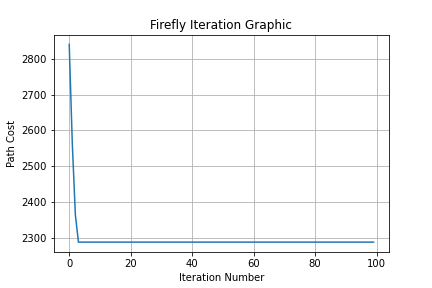

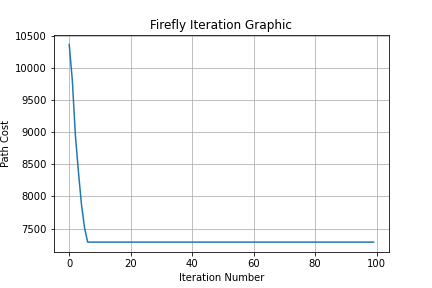

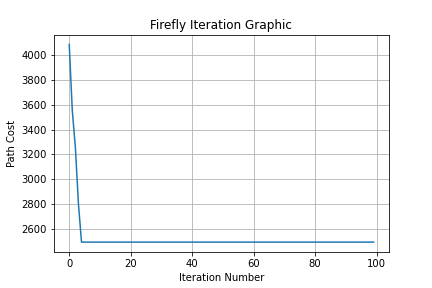

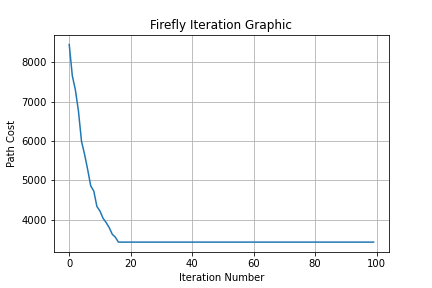

In [71]:
from IPython.display import Image
graphs_path=os.getcwd()+"\\graphs"
path_images=[]
iteration_images=[]
for filename in os.listdir(graphs_path):
    image_name=os.path.join(graphs_path, filename)
    if filename.find("path") !=-1:
        path_images.append(Image(image_name))
    elif filename.find("iteration") !=-1:
        iteration_images.append(Image(image_name))
print("Individual cluster path images:\n\n")
for img in path_images:
    display(img)
print("Iteration cost images:\n\n")
for img in iteration_images:
    display(img)

Text(0, 0.5, 'latitude')

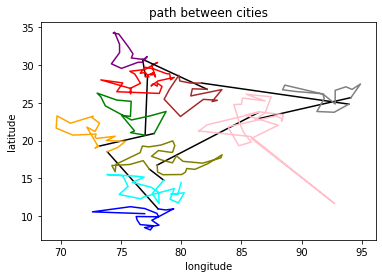

In [59]:
for i in range(len(cluster_path_lat)):
    if(i!=len(cluster_path_lat)-1):
            x=[cluster_path_long[i][-1], cluster_path_long[i+1][0]]
            y=[cluster_path_lat[i][-1], cluster_path_lat[i+1][0]]
            mtp.plot(x, y,c='black')
    mtp.plot(cluster_path_long[i], cluster_path_lat[i],c=colors[i])
    
mtp.title('path between cities')  
mtp.xlabel('longitude')  
mtp.ylabel('latitude')  